In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\Maria\Desktop\Программирование_3 сем\math\data_hw4.csv")
data.head()

,Item,Type,Group,Element,Controller,Word Number,Text,Sheet,Date Time,Timestamp,Device Id,Answer,Time Spent,Is Correct,Z-Score,Factor1,Factor2,Factor3
0,11,stimul1_light_think_0,1,0,AcceptabilityJudgment,NaN,"Дина думает, что Сева испачкал штаны.",0,25.05.2020 11:52,1590396746,588f4a3118f5ad5ae57d710af9510160,6.0,4564,NaN,0.764719,light,think,0.0
1,18,stimul1_light_say_1,2,0,AcceptabilityJudgment,NaN,"Что Паша говорит, что Вера нашла?",0,25.05.2020 11:52,1590396746,588f4a3118f5ad5ae57d710af9510160,3.0,2405,NaN,-0.611775,light,say,1.0
2,25,stimul1_say_whisper_0,3,0,AcceptabilityJudgment,NaN,"Митя шепчет, что Даша купила яблоки.",0,25.05.2020 11:52,1590396746,588f4a3118f5ad5ae57d710af9510160,3.0,3805,NaN,-0.611775,say,whisper,0.0
3,32,stimul1_say_babble_1,4,0,AcceptabilityJudgment,NaN,"Что Федя лепечет, что Тоня продала?",0,25.05.2020 11:52,1590396746,588f4a3118f5ad5ae57d710af9510160,1.0,2424,NaN,-1.529438,say,babble,1.0
4,39,stimul1_factive_regret_0,5,0,AcceptabilityJudgment,NaN,"Валя сожалеет, что Вова выпил молоко.",0,25.05.2020 11:52,1590396746,588f4a3118f5ad5ae57d710af9510160,6.0,6081,NaN,0.764719,factive,regret,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23328 entries, 0 to 23327
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Item         23328 non-null  int64  
 1   Type         23328 non-null  object 
 2   Group        23328 non-null  int64  
 3   Element      23328 non-null  int64  
 4   Controller   23328 non-null  object 
 5   Word Number  0 non-null      float64
 6   Text         23328 non-null  object 
 7   Sheet        23328 non-null  int64  
 8   Date Time    23328 non-null  object 
 9   Timestamp    23328 non-null  int64  
 10  Device Id    23328 non-null  object 
 11  Answer       22876 non-null  float64
 12  Time Spent   23328 non-null  int64  
 13  Is Correct   0 non-null      float64
 14  Z-Score      22876 non-null  float64
 15  Factor1      23328 non-null  object 
 16  Factor2      11664 non-null  object 
 17  Factor3      11664 non-null  float64
dtypes: float64(5), int64(6), object(7)
memory usag

In [7]:
data.drop(columns = ['Item', 'Type', 'Group', 'Element', 'Controller', 
'Word Number', 'Text', 'Sheet', 'Date Time', 'Timestamp', 'Device Id', 
'Time Spent', 'Is Correct', 'Factor1', 'Factor2', 'Factor3'], axis = 1, inplace = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23328 entries, 0 to 23327
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Answer   22876 non-null  float64
 1   Z-Score  22876 non-null  float64
dtypes: float64(2)
memory usage: 364.6 KB


In [11]:
data = data.dropna()

In [15]:
#можно так
data.describe()

,Answer,Z-Score
count,22876.000000,22876.000000
mean,4.457291,-0.049564
std,2.373858,1.044843
min,1.000000,-3.607001
25%,2.000000,-1.076667
50%,5.000000,0.119315
75%,7.000000,0.951117
max,7.000000,2.073399


In [19]:
#или так
#среднее
data.mean()

Answer     4.457291
Z-Score   -0.049564
dtype: float64

In [18]:
#стандартное отклонение
data.std()

Answer     2.373858
Z-Score    1.044843
dtype: float64

array([[<Axes: title={'center': 'Answer'}>]], dtype=object)

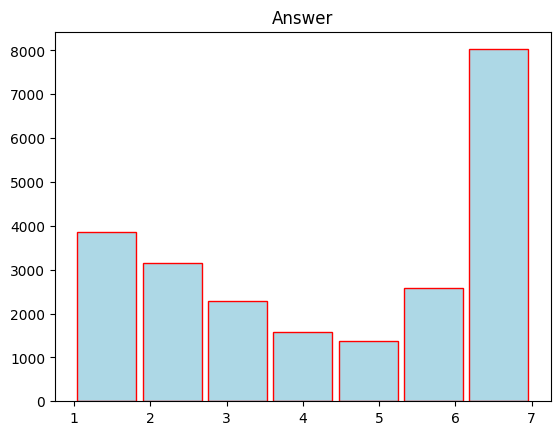

In [47]:
data.hist(column = 'Answer', bins= 7, grid = False, rwidth = 0.9, color = 'lightblue', ec = 'red')

array([[<Axes: title={'center': 'Z-Score'}>]], dtype=object)

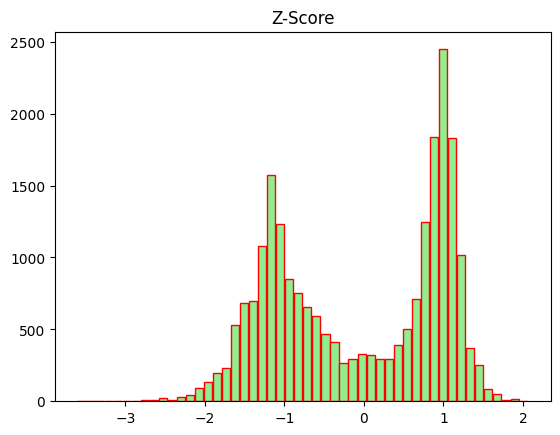

In [53]:
data.hist(column = 'Z-Score', bins= 50, grid = False, rwidth = 0.9, color = 'lightgreen', ec = 'red')

In [55]:
#просто корреляция
cor = data['Answer'].corr(data['Z-Score'])
cor

0.9580509425380382

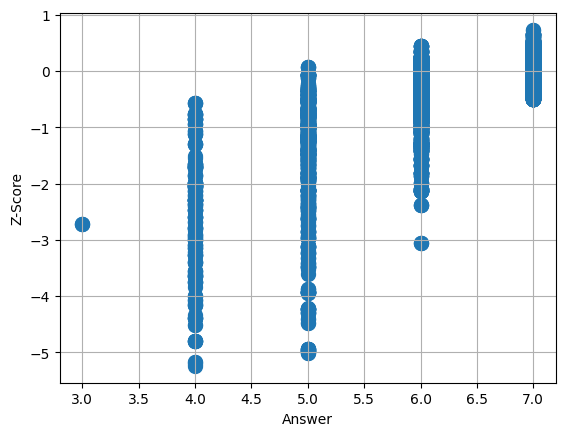

In [72]:
def cor_1(data):
    data1 = data
    xs = data1['Answer']
    ys = data1['Z-Score'].apply(np.log)
    pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s = 100, grid = True)
    plt.xlabel('Answer')
    plt.ylabel('Z-Score')
    plt.show()

cor_1(data)

In [65]:
from scipy.stats import pearsonr
pearsonr(data['Answer'], data['Z-Score'])

# p < 0,05, корреляция между столбцами статистически значимая

PearsonRResult(statistic=0.958050942538043, pvalue=0.0)

In [76]:
import statsmodels.api as sm
x = data['Answer']
y = data['Z-Score']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

In [77]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Z-Score   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 2.556e+05
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:17:05   Log-Likelihood:                -4875.1
No. Observations:               22876   AIC:                             9754.
Df Residuals:                   22874   BIC:                             9770.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9291      0.004   -458.006      0.000      -1.937      -1.921
Answer         0.4217      0.001    505.576      0.000       0.420       0.423
==============================================================================
Omnibus:                      954.531   Durbin-Watson:                   0.483
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1650.477
Skew:                          -0.349   Prob(JB):                         0.00
Kurtosis:                       4.115   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Answer', ylabel='Z-Score'>

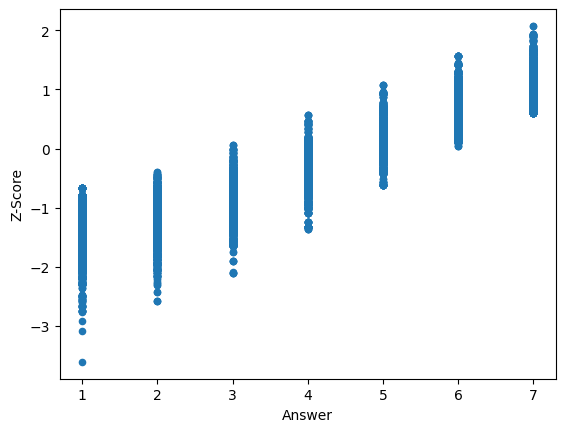

In [78]:
data.plot.scatter(x = 'Answer', y = 'Z-Score')

<Axes: >

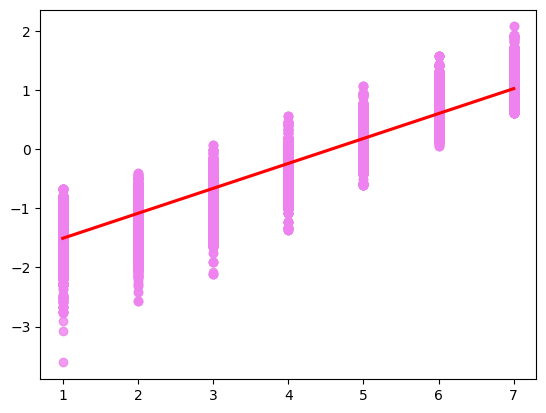

In [93]:
import seaborn as sns

x = np.array(data['Answer'])
y = np.array(data['Z-Score'])

sns.regplot(x = x, y = y, color='violet', line_kws=dict(color='r')) 

моё лицо когда я поудаляла все столбцы кроме answer и z-score и прочитала задание 5 :///

In [144]:
data = pd.read_csv(r"C:\Users\Maria\Desktop\Программирование_3 сем\math\data_hw4.csv")
data.head()

,Item,Type,Group,Element,Controller,Word Number,Text,Sheet,Date Time,Timestamp,Device Id,Answer,Time Spent,Is Correct,Z-Score,Factor1,Factor2,Factor3
0,11,stimul1_light_think_0,1,0,AcceptabilityJudgment,NaN,"Дина думает, что Сева испачкал штаны.",0,25.05.2020 11:52,1590396746,588f4a3118f5ad5ae57d710af9510160,6.0,4564,NaN,0.764719,light,think,0.0
1,18,stimul1_light_say_1,2,0,AcceptabilityJudgment,NaN,"Что Паша говорит, что Вера нашла?",0,25.05.2020 11:52,1590396746,588f4a3118f5ad5ae57d710af9510160,3.0,2405,NaN,-0.611775,light,say,1.0
2,25,stimul1_say_whisper_0,3,0,AcceptabilityJudgment,NaN,"Митя шепчет, что Даша купила яблоки.",0,25.05.2020 11:52,1590396746,588f4a3118f5ad5ae57d710af9510160,3.0,3805,NaN,-0.611775,say,whisper,0.0
3,32,stimul1_say_babble_1,4,0,AcceptabilityJudgment,NaN,"Что Федя лепечет, что Тоня продала?",0,25.05.2020 11:52,1590396746,588f4a3118f5ad5ae57d710af9510160,1.0,2424,NaN,-1.529438,say,babble,1.0
4,39,stimul1_factive_regret_0,5,0,AcceptabilityJudgment,NaN,"Валя сожалеет, что Вова выпил молоко.",0,25.05.2020 11:52,1590396746,588f4a3118f5ad5ae57d710af9510160,6.0,6081,NaN,0.764719,factive,regret,0.0


In [145]:
data.drop(columns = ['Item', 'Type', 'Group', 'Element', 'Controller', 
'Word Number', 'Text', 'Sheet', 'Date Time', 'Timestamp', 'Device Id', 
'Time Spent', 'Factor2', 'Factor3', 'Is Correct'], axis = 1, inplace = True)

In [146]:
data = data.dropna()

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22876 entries, 0 to 23327
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Answer   22876 non-null  float64
 1   Z-Score  22876 non-null  float64
 2   Factor1  22876 non-null  object 
dtypes: float64(2), object(1)
memory usage: 714.9+ KB


In [148]:
for c in data.columns:
    print(c)
    print(data[c].unique())

Answer
[6. 3. 1. 7. 2. 5. 4.]
Z-Score
[ 0.76471911 -0.61177529 -1.52943823 ...  0.92757942 -1.25496039
  0.49107145]
Factor1
['light' 'say' 'factive' '1' '0']


In [149]:
data = data.loc[data['Factor1'] != '1']

In [150]:
data = data.loc[data['Factor1'] != '0']

<Axes: title={'center': 'Answer'}, xlabel='Factor1'>

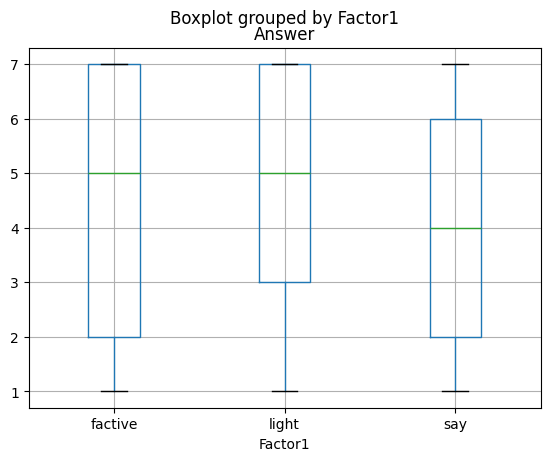

In [151]:
data.boxplot(column='Answer', by='Factor1')

<Axes: title={'center': 'Z-Score'}, xlabel='Factor1'>

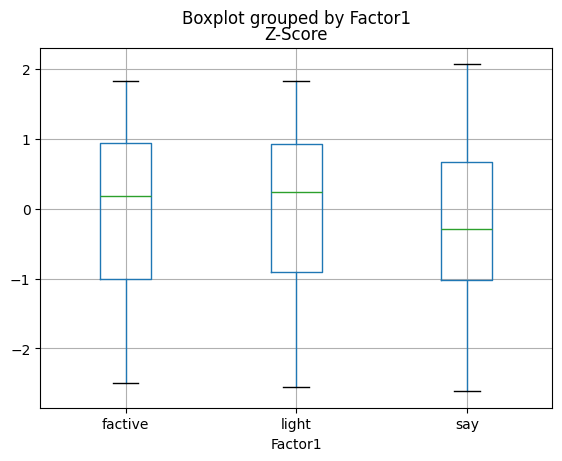

In [152]:
data.boxplot(column='Z-Score', by='Factor1')